### Task 3:

# Introduction: Customer Churn Prediction

## Problem Statement: To identify bank customers who are likely to leave (churn) using classification techniques and understand what factors contribute to churn.

### Objective 1: Load and Explore the Dataset

In [77]:
import pandas as pd

In [78]:
# Load Dataset
df=pd.read_csv("C:/Users/luqma/Downloads/archive/Churn_Modelling.csv")

In [79]:
# Dataset Structure
print("Shape:", df.shape)

Shape: (10000, 14)


In [80]:
# Columns Names
print("Columns:", df.columns.tolist())

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [81]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Objective 2: Clean and Prepare the Dataset

In [83]:
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [84]:
# Check for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [85]:
if df.isnull().sum().sum() == 0:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values found. Consider filling or dropping them.")

✅ No missing values found in the dataset.


### Objective 3: Encode Categorical Features (Geography, Gender)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
# Before Encoding Gender Row
print("Before Encoding (Sample Rows):")
display(df_before_encoding[['Gender']].head(7))

Before Encoding (Sample Rows):


,Gender
0,Female
1,Female
2,Female
3,Female
4,Female
5,Male
6,Male


In [88]:
# Label encoding for Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [89]:
# After Encoding Gender Row
print("After Encoding (Sample Rows):")
display(df[['Gender']].head(7))

After Encoding (Sample Rows):


,Gender
0,0
1,0
2,0
3,0
4,0
5,1
6,1


In [90]:
# Before One-Hot Endcoding of Geography Column
print("Before Encoding (Sample Rows):")
display(df_before_encoding[['Geography']].head())

Before Encoding (Sample Rows):


,Geography
0,France
1,Spain
2,France
3,France
4,Spain


In [91]:
# One-hot encoding for Geography
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [92]:
# After One-Hot Endcoding of Geography Column
print("After Encoding (Sample Rows):")
display(df[['Geography_Germany', 'Geography_Spain']].head())

After Encoding (Sample Rows):


,Geography_Germany,Geography_Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


### Objective 4: Train a Classification Model

In [93]:
#Import Scikit-Learn Tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [94]:
# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [95]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
# Predict
y_pred = model.predict(X_test)

🌲 Random Forest Evaluation
✅ Accuracy: 86.60%


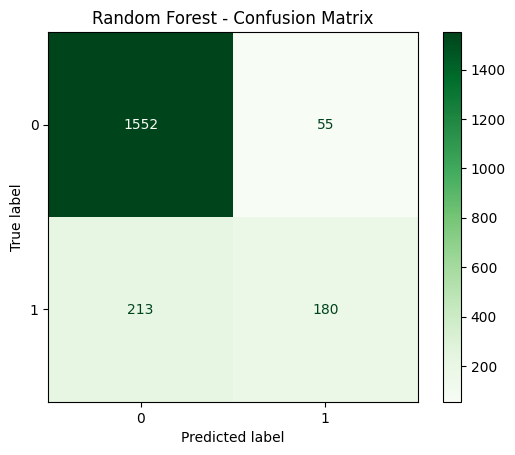

In [98]:
# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("🌲 Random Forest Evaluation")
print(f"✅ Accuracy: {rf_accuracy:.2%}")  # percentage format with 2 decimal points
disp_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens')
disp_rf.ax_.set_title('Random Forest - Confusion Matrix')
plt.grid(False)
plt.show()

### Objective 5: Analyze Feature Importance

In [99]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# Feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

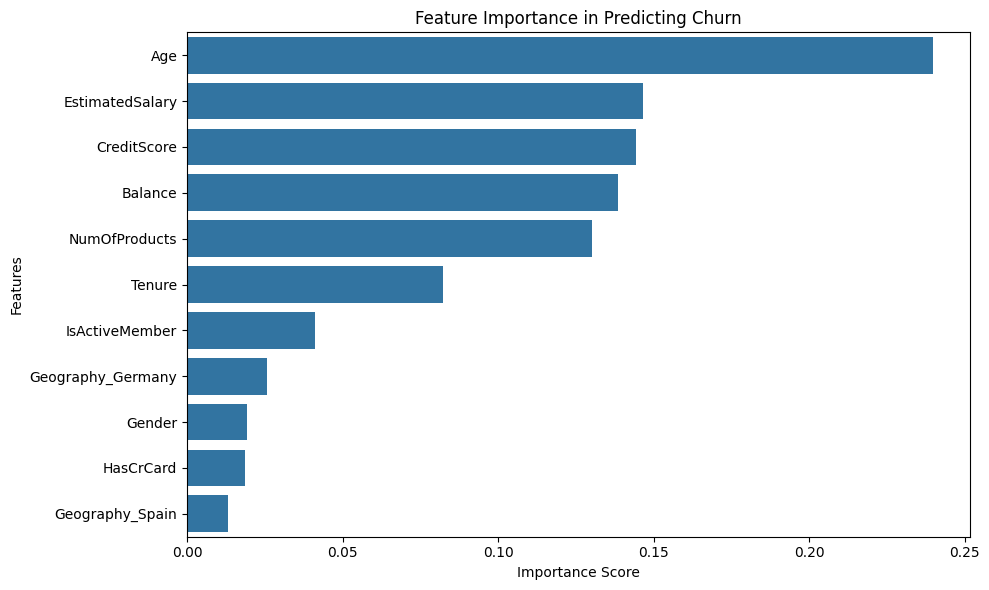

In [101]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importance in Predicting Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## ✅ Conclusion

- Explored the **Customer Churn Dataset** to identify customers likely to leave the bank.
- Performed initial data checks and preprocessing.
- Handled:
  - **Encoding** of categorical variables (e.g., Gender, Geography)
- Trained a classification model:
  - 🌲 **Random Forest Classifier**
- **Evaluation Metrics Used**:
  - Accuracy Score
  - Confusion Matrix

### 🔍 Results:
- **Random Forest Accuracy**: `86.60%`

### 📌 Insights:
- The model performed well in predicting churned customers.
- Key features influencing churn included **Credit Score**, **Balance**, and **Geography**.
- With further tuning or ensemble methods, performance could be improved further.
- This model can support banks in proactively identifying and retaining high-risk customers.
